## Example notebook for the ATOM pipeline
Load one of the three imported datasets before running the AutoML function. These datasets are provided by sklearn and are very small and easy to learn. You can learn more about these datasets at https://scikit-learn.org/stable/datasets/index.html.
    
    load_breast_cancer: binary classification
    load_wine: multi-class classification
    load_boston: regression

Or load the Australian Weather dataset from Kaggle at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. This one is larger and contains missing values as well as more features.

In [2]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from automl import ATOM

In [ ]:
# Load the sklearn data sets as pandas dataframes
x = load_breast_cancer()

data = np.c_[x.data, x.target]
columns = np.append(x.feature_names, ["target"])
data = pd.DataFrame(data, columns=columns)
X = data.drop('target', axis=1)
Y = data['target']

In [3]:
# Or load the Australian weather dataset
# Make sure to have it in the same directory as yout notebook or change the path!

X = pd.read_csv('weatherAUS.csv')
X['missing_values'] = '?'  # Add (mock) feature with many missing values
Y = X['RainTomorrow']
X = X.drop('RISK_MM', axis=1)  # Feature directly related to target (Rain Tomorrow)
X = X.drop('RainTomorrow', axis=1)

In [11]:
# Run AutoML pipeline
aml = ATOM(models=['GNB', 'MNB', 'GP', 'LogReg', 'RF', 'lSVM'],
           metric="f1",
           impute='median',
           features=0.8,
           ratio=0.25,
           max_iter=5,
           init_points=3,
           n_splits=5,
           verbose=0)

aml.fit(X, Y, percentage=1)


<================ AutoML ================>

Algorithm set to binary classification.
Models in pipeline: ['GNB', 'MNB', 'GP', 'LogReg', 'RF', 'lSVM']

Data stats =====================>
Number of features: 18
Number of instances: 1421
Size of the training set: 1065
Size of the validation set: 356


Running pipeline =====================>


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:39<00:00, 18.92s/it]




Final stats ================>>
Total duration: 0.034 hours
Target metric: F1
------------------------------------
Gaussian Naïve Bayes          --> 0.561 ± 0.067
Gaussian Process              --> 0.495 ± 0.031
Logistic Regression           --> 0.560 ± 0.018
Random Forest                 --> 0.574 ± 0.052 !!
Linear Support Vector Machine --> 0.544 ± 0.023


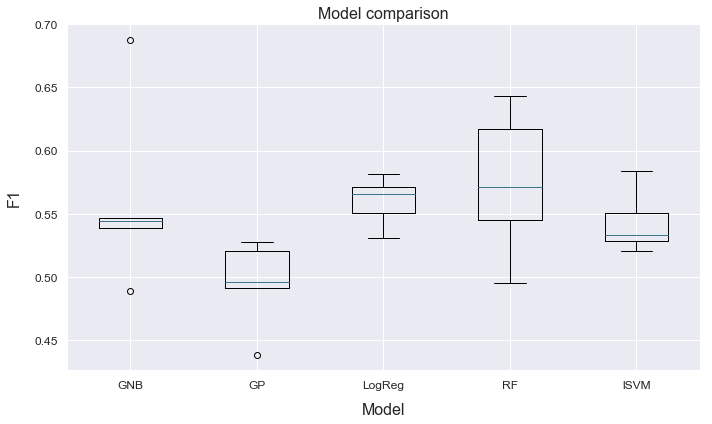

In [12]:
aml.boxplot()

In [13]:
aml.LogReg.best_params

{'max_iter': 214, 'C': 3.3, 'penalty': 'l2'}

In [14]:
aml.GNB.best_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
aml.LogReg.Precision()

0.6444444444444445

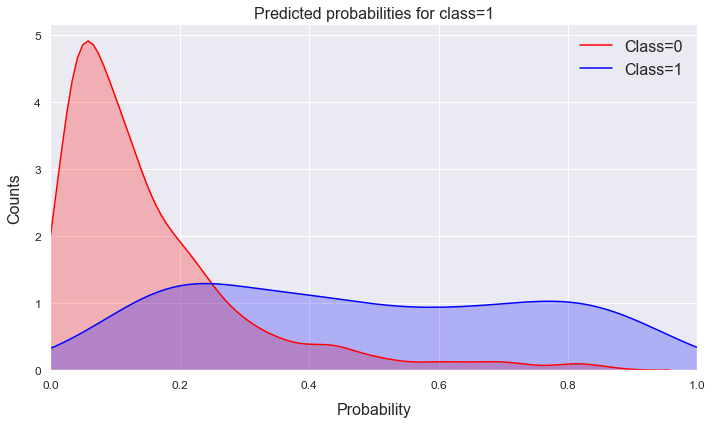

In [17]:
aml.lSVM.plot_probabilities()

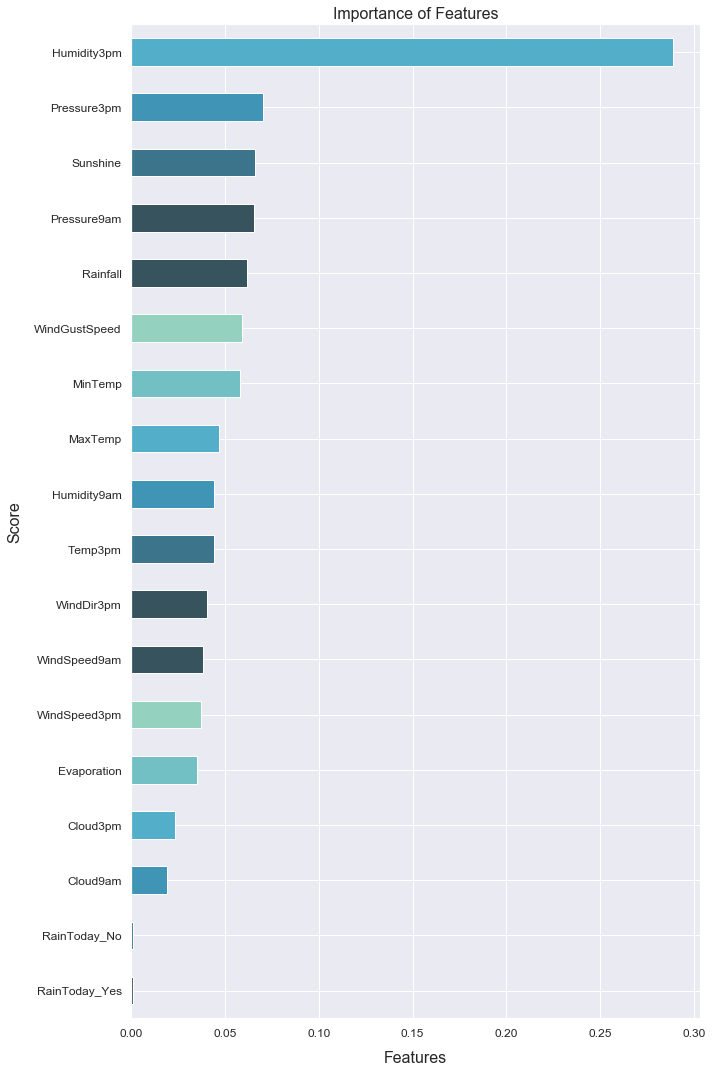

In [18]:
aml.RF.plot_feature_importance()

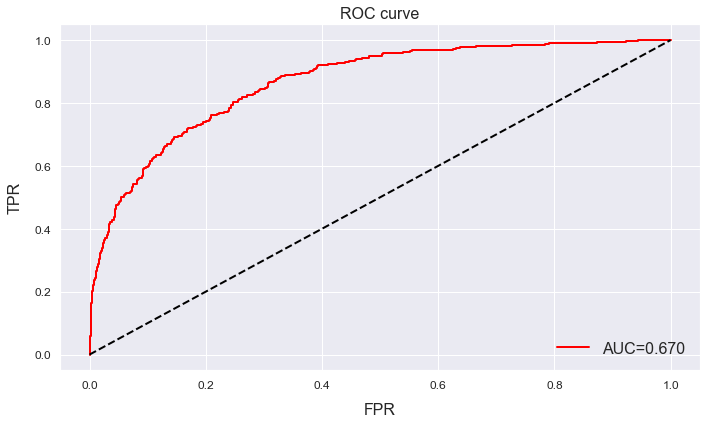

In [19]:
aml.LogReg.plot_ROC()

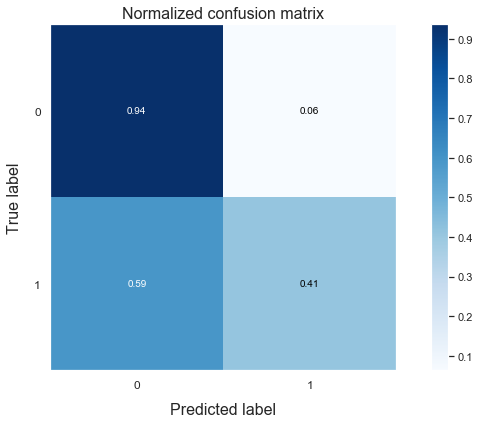

In [20]:
aml.RF.plot_confusion_matrix()

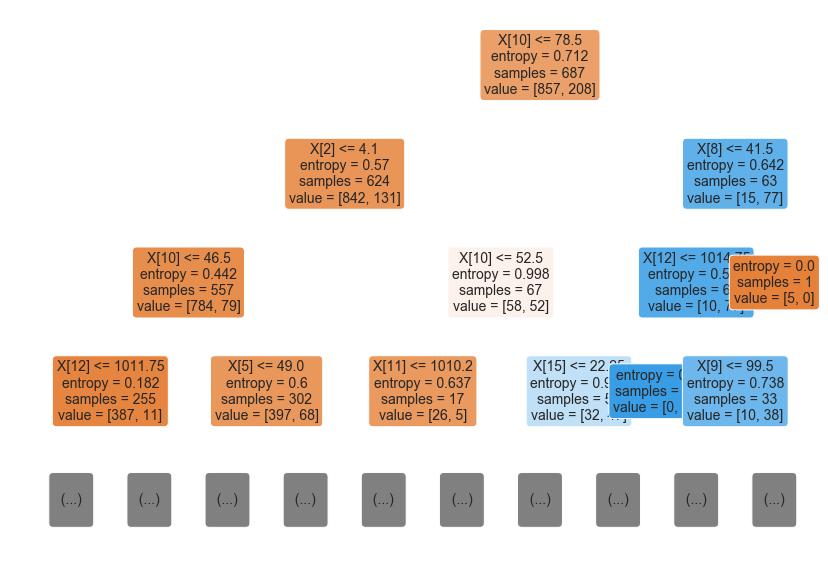

In [22]:
aml.RF.plot_decision_tree(0, max_depth=3, rotate=False)